In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/telecom_churn.csv")

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape

(3333, 20)

In [5]:
df["State"].nunique()

51

In [6]:
df["State"].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


# Визуализация зависимостей между признаками

## 1. Признаки по одному

### 1.1 Количественные

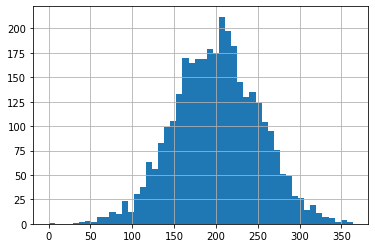

In [13]:
df["Total eve minutes"].hist(bins = 50)

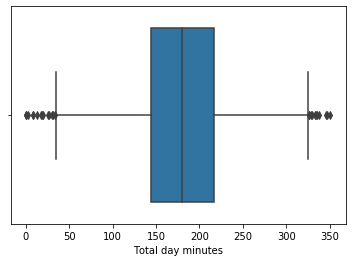

In [14]:
sns.boxplot(df["Total day minutes"])

## 1.2 Категориальные (качественные, текстовые)

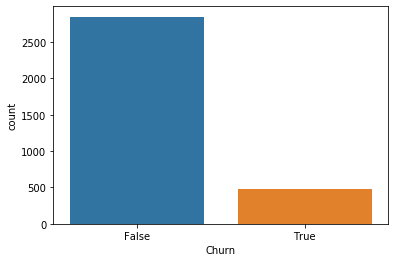

In [15]:
sns.countplot(df["Churn"])

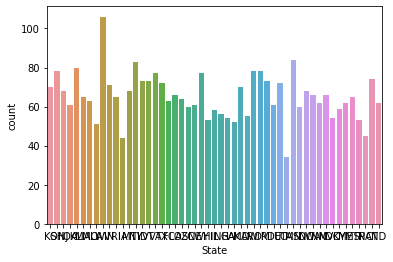

In [16]:
sns.countplot(df["State"])

In [18]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: State, dtype: int64

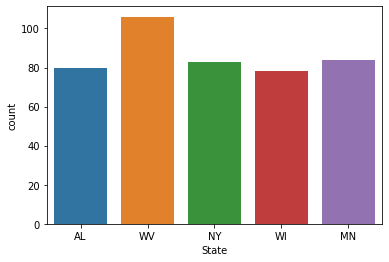

In [23]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"])

# 2. Взаимодействие признаков друг с другом

## 2.1 Количественный с количественным

In [24]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [29]:
features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes', 'Customer service calls']

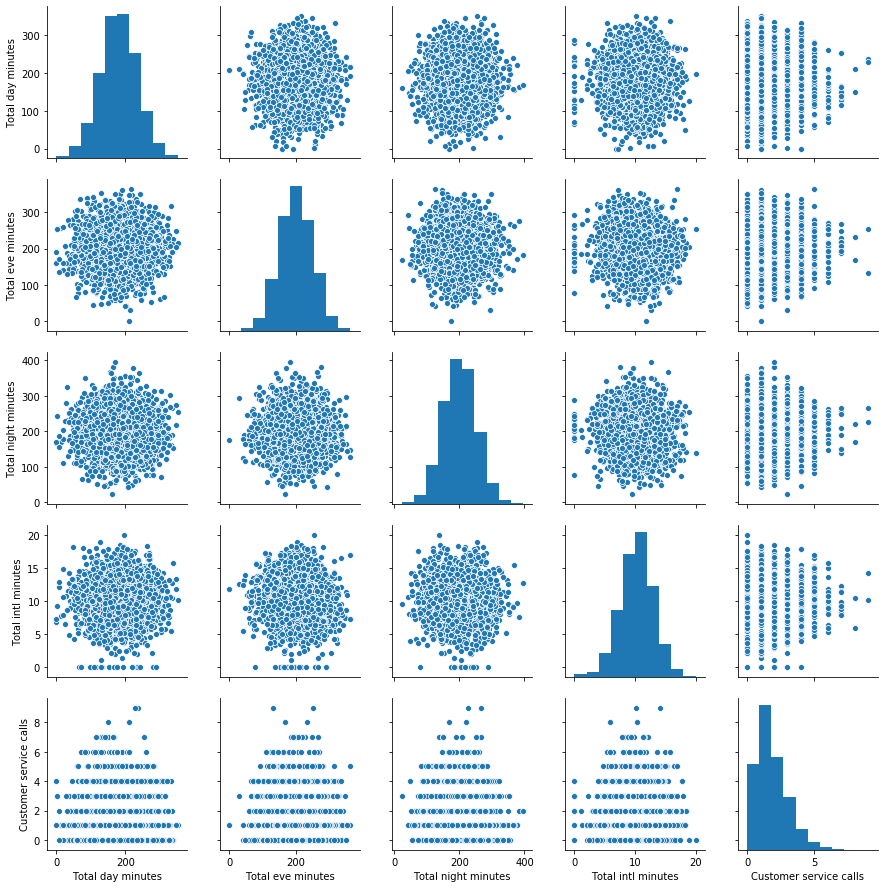

In [30]:
sns.pairplot(df[features])

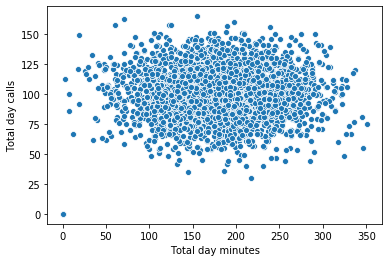

In [32]:
sns.scatterplot(df["Total day minutes"], df["Total day calls"])

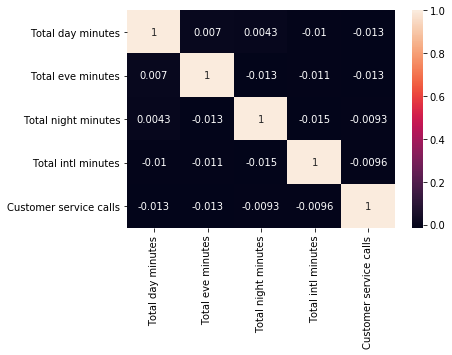

In [33]:
sns.heatmap(df[features].corr(), annot=True)

In [36]:
df_num = df.select_dtypes(exclude = "object")

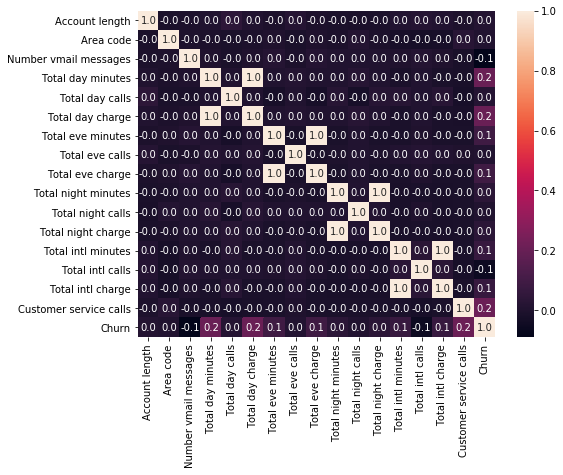

In [41]:
plt.figure(figsize = (8,6))
sns.heatmap(df_num.corr(), annot=True, fmt = ".1f");

In [44]:
df_float = df.select_dtypes(include = "float64")

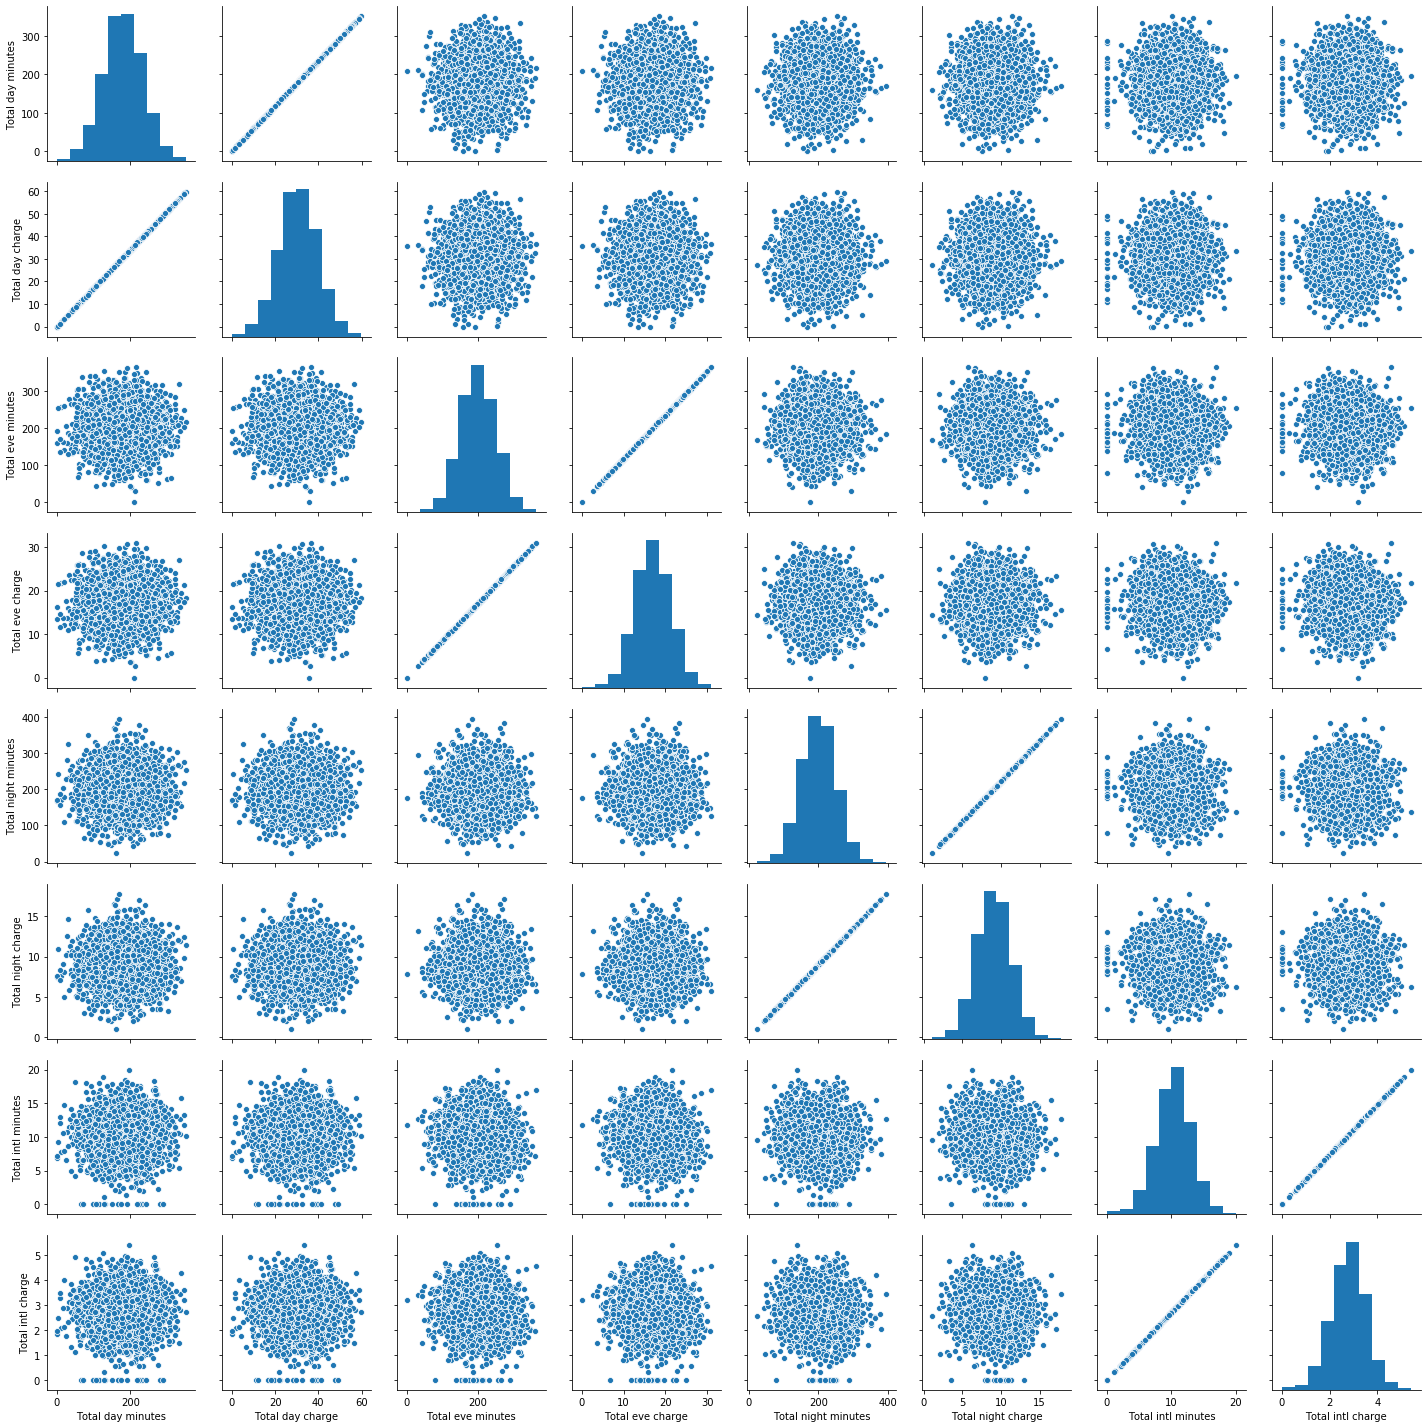

In [46]:
sns.pairplot(df_float)

# 2.2. Количественный с качественным

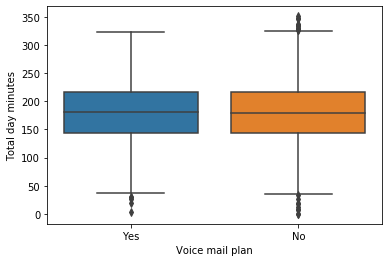

In [47]:
sns.boxplot(df["Voice mail plan"], df["Total day minutes"])

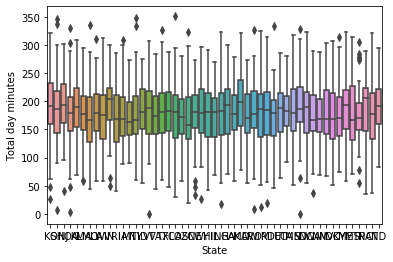

In [49]:
sns.boxplot(df["State"], df["Total day minutes"])

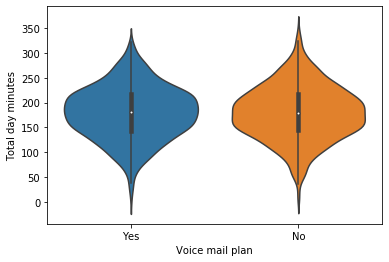

In [50]:
sns.violinplot(df["Voice mail plan"], df["Total day minutes"])

# 2.3 Категориальный с категориальным

In [ ]:
d_churn = 

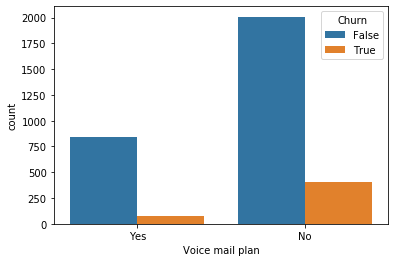

In [53]:
sns.countplot(x = df["Voice mail plan"], hue = df["Churn"], )

In [54]:
pd.crosstab(df["Churn"], df["Voice mail plan"])

Voice mail plan,No,Yes
Churn,,
False,2008,842
True,403,80


In [55]:
pd.crosstab(df["Churn"], df["Customer service calls"])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2
